In [1]:
import Ramsey_ExperimentV2
import numpy as np

In [2]:
from tqdm import tqdm
import random

shots = np.arange(100, 10000, 1000)
errors_global = []
errors_local = []
n = 4
delay = [0.3]


repetitions = 10
for rep in range(repetitions):
    rep_error_global = []
    rep_error_local = []
    W = [random.gauss(0, 3) for _ in range(n)]
    Decay = [random.gauss(3, 1) for _ in range(n)]
    J = [random.gauss(0, 3) for _ in range(n - 1)]
    for s in tqdm(shots, desc=f"Repetition {rep}"):
        batch_x, batch_y = Ramsey_ExperimentV2.ramsey_global(n, s, delay, Decay, W, J)
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV2.ramsey_local(n, s, delay, Decay,
                                                                                                  W, J)

        Decay_local, W_local, J_local = Ramsey_ExperimentV2.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
                                                                           batch_y_cross)
        Decay_global, W_global, J_global = Ramsey_ExperimentV2.full_complex_fit(batch_x, batch_y, neighbors=1)

        rep_error_global.append(Ramsey_ExperimentV2.percent_error(np.concatenate([Decay, W, J]),
                                                                  np.concatenate([Decay_global, W_global, J_global])))
        rep_error_local.append(Ramsey_ExperimentV2.percent_error(np.concatenate([Decay, W, J]),
                                                                 np.concatenate([Decay_local, W_local, J_local])))
    errors_global.append(rep_error_global)
    errors_local.append(rep_error_local)


Repetition 0:   0%|          | 0/10 [00:00<?, ?it/s]C:\Projects\Crosstalk\Ramsey_ExperimentV2.py:548: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess)
Repetition 9: 100%|██████████| 10/10 [02:21<00:00, 14.11s/it]


In [22]:
errors_global_reshaped = list(map(list, zip(*errors_global)))
errors_global_median = [np.median(np.array(errors_global_reshaped[i])) for i in range(len(errors_global_reshaped))]

errors_local_reshaped = list(map(list, zip(*errors_local)))
errors_local_median = [np.median(np.array(errors_local_reshaped[i])) for i in range(len(errors_local_reshaped))]

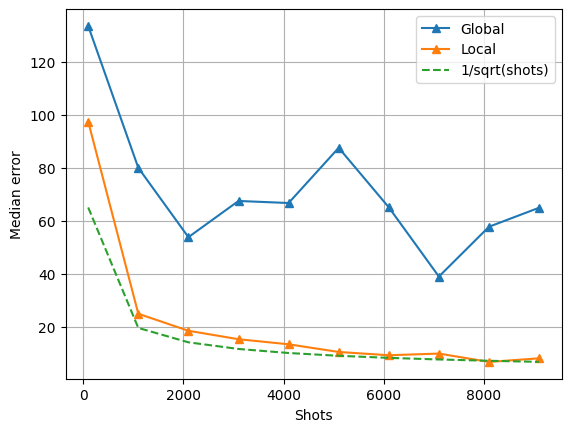

In [23]:
import matplotlib.pyplot as plt

plt.plot(shots, errors_global_median, '-^', label='Global')
plt.plot(shots, errors_local_median, '-^', label='Local')
plt.plot(shots, np.e * 2.394 /np.sqrt(shots) * 100, '--', label='1/sqrt(shots)')
plt.xlabel('Shots')
plt.ylabel('Median error')
plt.grid()
plt.legend()